# 什么是肤色检测

在没有AI之前，肤色检测是计算机视觉的一项常见任务。其根本思路是划定一个颜色区域，只要属于该颜色区域的像素就认为属于肤色。但是这种方法的精确度不高，并且常常有错误的区域被误认为皮肤。

尽管AI或者机器学习已经能够很好的从图片中识别出肤色部分。但是作为经典图像学任务，我想了想还是花点时间介绍肤色的常见识别算法。因此，在本文中我们介绍其中一种方法，将RGB图像转换到HSV色彩空间，然后在HSV空间中设置适当的阈值以检测肤色。

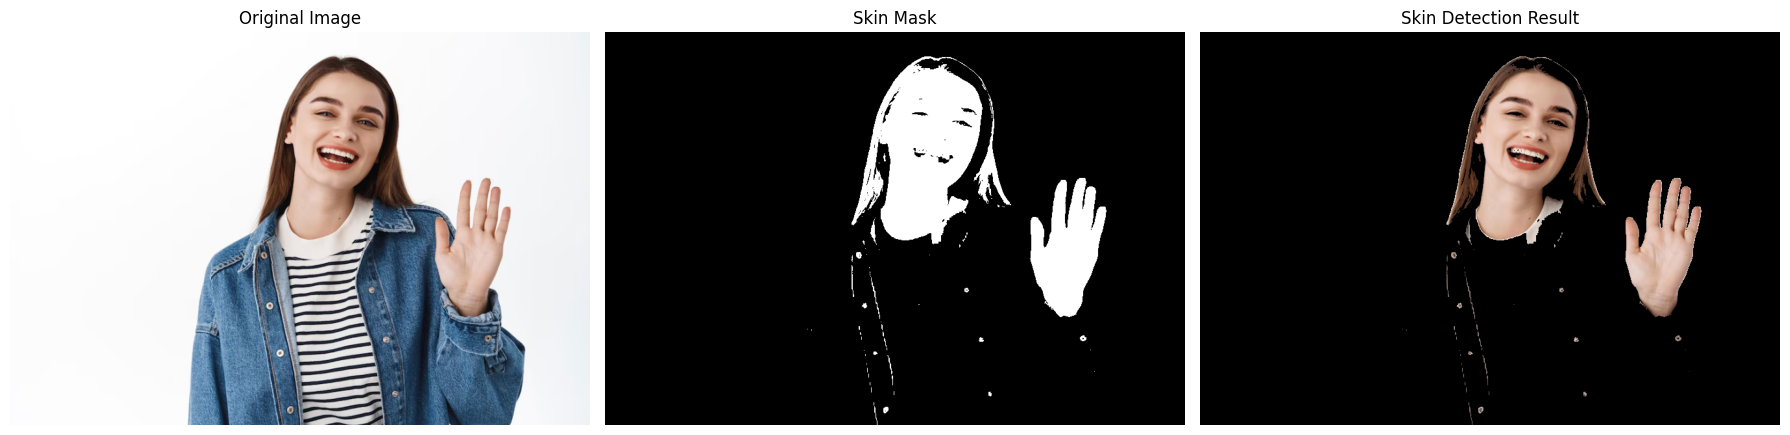

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def skin_detection(image):
    # Convert image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define range for skin color in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Threshold the HSV image to get only skin colors
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Bitwise-AND mask and original image
    skin = cv2.bitwise_and(image, image, mask=skin_mask)

    return skin, skin_mask

def main():
    # Load an RGB image
    image = cv2.imread("/opt/images/greeting.png")

    # Perform skin detection
    skin, skin_mask = skin_detection(image)

    # Create a new figure with a specific size (in inches)
    plt.figure(figsize=(18, 5))  # Increase width for horizontal layout

    # Display the original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')  # Hide x and y axis

    # Display the skin mask
    plt.subplot(1, 3, 2)
    plt.imshow(skin_mask, cmap="gray")
    plt.title("Skin Mask")
    plt.axis('off')  # Hide x and y axis

    # Display the image with skin detection
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
    plt.title("Skin Detection Result")
    plt.axis('off')  # Hide x and y axis

    plt.tight_layout()  # Adjust layout to avoid overlapping
    plt.show()

if __name__ == "__main__":
    main()
